# **INTERNET SERVICE CHURN PREDICTION**

---



---




### > **Objectives**

* To identify the customers on the basis of their profiles that are likely to churn with available features.
* To build models that predict whether customers will churn or not.


---




**What is Churn?**

Churn is a measurement of the percentage of accounts that cancel or choose not to renew their subscriptions.


*   Churn rates can be applied to subscription-based businesses as well to the number of employees that leave a firm.
*   The churn rate and growth rate are diametrically opposite factors, as the former measures the loss of customers and the other measures the acquisition of customers.
*   For a company to experience growth it must ensure that its new subscriptions are higher than its lost subscriptions in a given period.
 

**Churn rate provides information about -**



*   Clarity on the quality of the business.
*   Indicates whether customers are satisfied or dissatisfied with the product or service.


---


### **Context**
There is a big competition between Internet service providers. If a provider wants to increase its revenue, he needs more subscribers but to keep existing customer is more important than having new ones. So, providers want to know which customer could cancel his/her services. If they know who can go, maybe they can catch them with promotional offers.


### **Introduction to data**
The dataset consist of the following features: 
1) is_is_tv_subscriber customer - has a tv subscription ?

2) is_movie_package_subscriber?

3) subscription_age - how many year has the customer use our service

4) bill_avg - last 3 months bill avg

5) remaining_contract - how many year remaining for customer contract. If null; customer didn't have a contract. the customer who has a contract time have to use their service until contract end.if they canceled their service before contract time end they pay a penalty fare.

Two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So, even if a person is not in a contract, he's still a user who's paying monthly fees.

5) service_failure_count customer - call count to call center for service failure for last 3 months

6) download_avg - last 3 months internet usage (GB)

7) upload_avg last - 3 months upload avg (GB)

8) download_over_limit - most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months

9) churn - this is the target column. if 1 customer canceled his service

The dataset is taken from https://www.kaggle.com/mehmetsabrikunt/internet-service-churn/metadata

Consist of 72275 rows and 11 columns.






















In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\kunal\OneDrive\Desktop\Internet Churn\CSV\internet_service_churn.csv")

In [3]:
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [5]:
df.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
remaining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

# **Data Cleaning**

In [6]:
del df['id']

In [7]:
df=df.drop_duplicates()
df

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [8]:
df.dropna(subset=['download_avg','upload_avg'], how='any', inplace=True)

In [9]:
df['remaining_contract'] = df['remaining_contract'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69940 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             69940 non-null  int64  
 1   is_movie_package_subscriber  69940 non-null  int64  
 2   subscription_age             69940 non-null  float64
 3   bill_avg                     69940 non-null  int64  
 4   remaining_contract           69940 non-null  float64
 5   service_failure_count        69940 non-null  int64  
 6   download_avg                 69940 non-null  float64
 7   upload_avg                   69940 non-null  float64
 8   download_over_limit          69940 non-null  int64  
 9   churn                        69940 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.9 MB


In [11]:
df = df.reset_index()
del df['index']
df.index.name = 'User'
df.index = df.index + 1
df

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
User,,,,,,,,,,
1,1,0,11.95,25,0.14,0,8.4,2.3,0,0
2,0,0,8.22,0,0.00,0,0.0,0.0,0,1
3,1,0,8.91,16,0.00,0,13.7,0.9,0,1
4,0,0,6.87,21,0.00,1,0.0,0.0,0,1
5,0,0,6.39,0,0.00,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
69936,1,1,0.09,0,1.25,0,0.0,0.0,0,1
69937,1,0,0.06,1,1.63,0,0.8,0.0,0,1
69938,1,0,0.02,0,2.19,0,1.5,0.2,0,1


In [12]:
df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000,69940.000000
mean,0.824621,0.340177,2.484896,19.262611,0.511319,0.282771,44.909335,4.309101,0.208021,0.544710
std,0.380294,0.473772,2.037549,13.182697,0.669636,0.828186,63.857882,9.929691,0.997778,0.498001
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.950000,13.000000,0.000000,0.000000,8.200000,0.600000,0.000000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,29.150000,2.200000,0.000000,1.000000
75%,1.000000,1.000000,3.370000,23.000000,1.050000,0.000000,61.800000,5.000000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


# **EDA and Data Visualization**

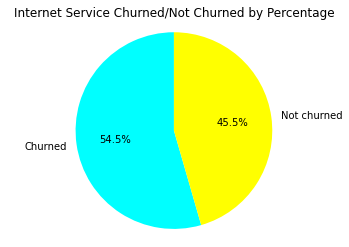

In [13]:
x = len(df[df['churn']== 1])
y = len(df[df['churn']== 0])
data = [x, y]
label = ['Churned', 'Not churned']
 
plt.pie(data, labels=label,autopct='%1.1f%%', colors=['cyan', 'yellow'],startangle=90)
plt.title('Internet Service Churned/Not Churned by Percentage')
plt.axis('equal')
plt.show()

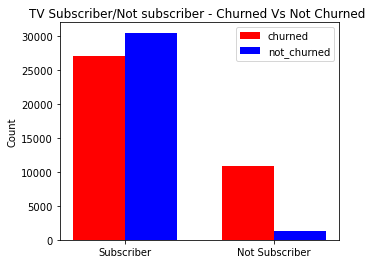

In [14]:
is_tv_subscriber_churned  = len(df[(df['is_tv_subscriber'] == 1) & (df['churn'] == 1)])
not_is_tv_subscriber_churned  = len(df[(df['is_tv_subscriber'] == 0) & (df['churn'] == 1)])
is_tv_subscriber_not_churned  = len(df[(df['is_tv_subscriber'] == 1) & (df['churn'] == 0)])
not_is_tv_subscriber_not_churned  = len(df[(df['is_tv_subscriber'] == 0) & (df['churn'] == 0)])

labels = ['Subscriber', 'Not Subscriber']
churn = [is_tv_subscriber_churned, not_is_tv_subscriber_churned]
no_churn = [is_tv_subscriber_not_churned, not_is_tv_subscriber_not_churned ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(5,4))
plt.bar(x - width/2, churn, width, label='churned', color='red')
plt.bar(x + width/2, no_churn, width, label='not_churned', color='blue')
plt.ylabel('Count')
plt.xticks(x, labels)
plt.title('TV Subscriber/Not subscriber - Churned Vs Not Churned ')
plt.legend()
plt.show()

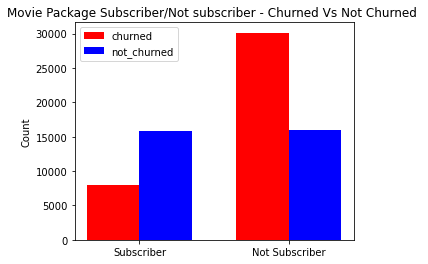

In [15]:
is_movie_package_subscriber_churned  = len(df[(df['is_movie_package_subscriber'] == 1) & (df['churn'] == 1)])
not_is_movie_package_subscriber_churned  = len(df[(df['is_movie_package_subscriber'] == 0) & (df['churn'] == 1)])
is_movie_package_subscriber_not_churned  = len(df[(df['is_movie_package_subscriber'] == 1) & (df['churn'] == 0)])
not_is_movie_package_subscriber_not_churned  = len(df[(df['is_movie_package_subscriber'] == 0) & (df['churn'] == 0)])

labels = ['Subscriber', 'Not Subscriber']
churn = [is_movie_package_subscriber_churned, not_is_movie_package_subscriber_churned]
no_churn = [is_movie_package_subscriber_not_churned, not_is_movie_package_subscriber_not_churned]
c1 = ['red']
c2=['blue'] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(5,4))
plt.bar(x - width/2, churn, width, label='churned', color=c1)
plt.bar(x + width/2, no_churn, width, label='not_churned', color=c2)
plt.ylabel('Count')
plt.xticks(x, labels)
plt.title('Movie Package Subscriber/Not subscriber - Churned Vs Not Churned ')

plt.legend()
plt.show()

<AxesSubplot:title={'center':'User by TV subscriber/Movie Subscriber/Churn'}, xlabel='is_tv_subscriber,is_movie_package_subscriber,churn', ylabel='Count'>

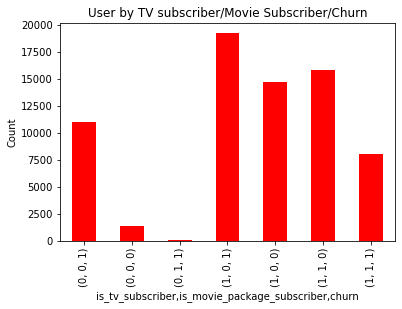

In [16]:
x = df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['churn'].value_counts()
plt.figure(figsize=(6,4))
plt.ylabel('Count')
x.plot(kind='bar', color = 'red', title="User by TV subscriber/Movie Subscriber/Churn")

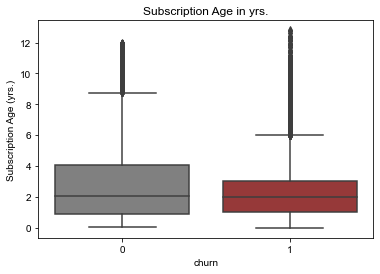

In [17]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="subscription_age", data= df)
plt.ylabel('Subscription Age (yrs.)')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title('Subscription Age in yrs.')
plt.show()

In [18]:
x = df[['churn', 'subscription_age']]
y = x.query('churn <= 0')
y.describe()

,churn,subscription_age
count,31843.0,31843.000000
mean,0.0,2.743422
std,0.0,2.334756
min,0.0,0.020000
25%,0.0,0.890000
50%,0.0,2.070000
75%,0.0,4.040000
max,0.0,11.950000


In [19]:
no_contract_churned = len(df[(df['remaining_contract'] == 0) & (df['churn'] == 1)])
contract_remain_churned = len(df[~(df['remaining_contract']== 0) & (df['remaining_contract'] != 0.0) & (df['churn'] == 1)])
contract_over_churned  = len(df[(df['remaining_contract']==0) & (df['churn'] == 1)])
no_contract_no_churned = len(df[(df['remaining_contract']==0) & (df['churn'] == 0)])
contract_remain_not_churned = len(df[~(df['remaining_contract']==0) & (df['remaining_contract'] != 0.0) & (df['churn'] == 0)])
contract_over_not_churned  = len(df[(df['remaining_contract'] == 0.0) & (df['churn'] == 0)])

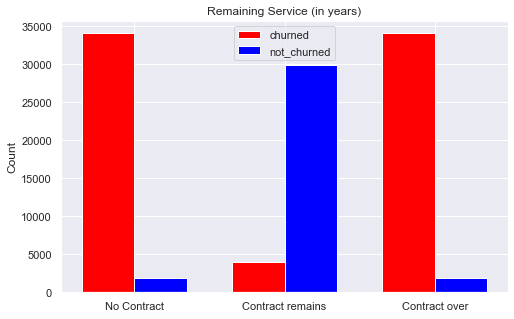

In [20]:
labels = ['No Contract','Contract remains', 'Contract over']
churn = [no_contract_churned,contract_remain_churned , contract_over_churned]
no_churn = [no_contract_no_churned,contract_remain_not_churned , contract_over_not_churned]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(8,5))
ay = plt.bar(x - width/2, churn, width, label='churned', color = c1)
ax = plt.bar(x + width/2, no_churn, width, label='not_churned',color = c2)
plt.xticks(x, labels)
plt.ylabel('Count')

plt.title('Remaining Service (in years)')
plt.legend()

plt.show()

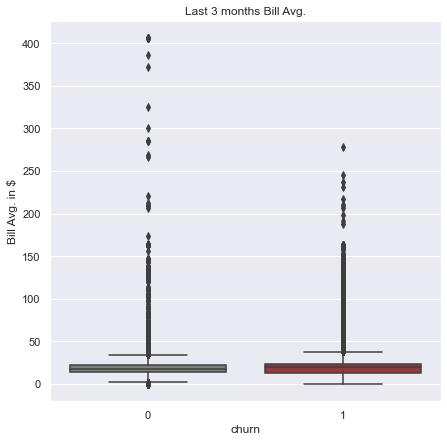

In [21]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="bill_avg",data=df )
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Last 3 months Bill Avg.')
plt.ylabel('Bill Avg. in $')
plt.show() 

In [22]:
x = df[['churn', 'bill_avg']]
y = x.query('churn >= 1')
y.describe()

,churn,bill_avg
count,38097.0,38097.000000
mean,1.0,19.127438
std,0.0,13.065055
min,1.0,0.000000
25%,1.0,13.000000
50%,1.0,20.000000
75%,1.0,23.000000
max,1.0,278.000000


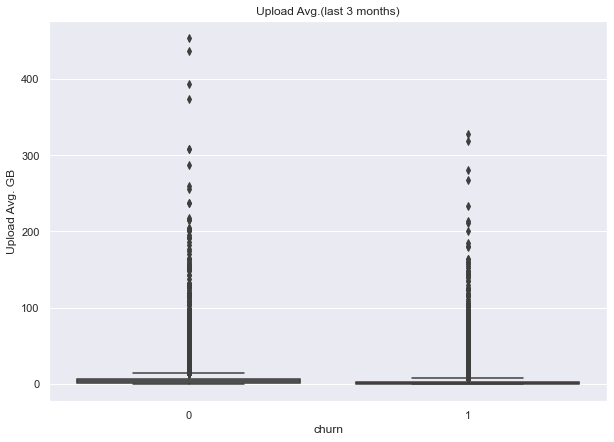

In [23]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="upload_avg",data= df)
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Upload Avg.(last 3 months)')
plt.ylabel('Upload Avg. GB')
plt.show()

In [24]:
x = df[['churn', 'upload_avg']]
y = x.query('churn <= 0')
y.describe()

,churn,upload_avg
count,31843.0,31843.000000
mean,0.0,5.983563
std,0.0,11.522778
min,0.0,0.000000
25%,0.0,1.900000
50%,0.0,3.700000
75%,0.0,6.700000
max,0.0,453.300000


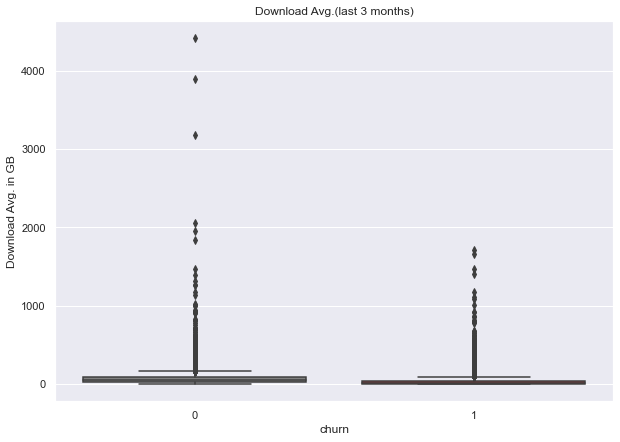

In [25]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="download_avg",data= df)
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Download Avg.(last 3 months)')
plt.ylabel('Download Avg. in GB')
plt.show()

In [26]:
x = df[['churn', 'download_avg']]

y = x.query('churn >= 1')
y.describe()

,churn,download_avg
count,38097.0,38097.000000
mean,1.0,28.213101
std,0.0,46.893323
min,1.0,0.000000
25%,1.0,0.500000
50%,1.0,13.600000
75%,1.0,38.600000
max,1.0,1706.200000


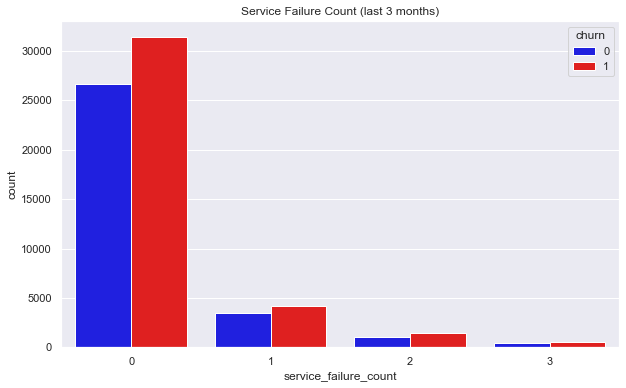

In [27]:
data = df[df['service_failure_count']<4]
plt.figure(figsize = (10,6))
my_colors = ["blue", "red"]
sns.set_palette( my_colors )

sns.countplot(data = data, x = 'service_failure_count', hue = 'churn')
plt.title('Service Failure Count (last 3 months)')
plt.show()

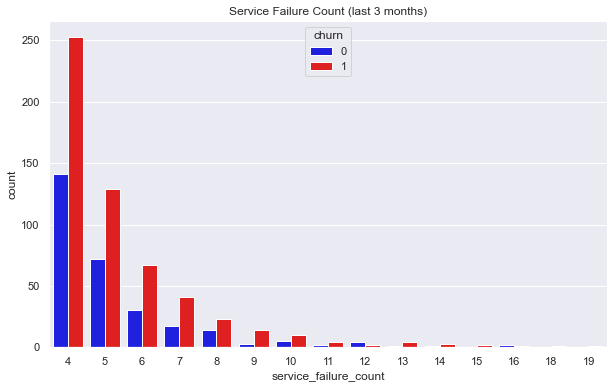

In [28]:
data = df[df['service_failure_count']>=4]
plt.figure(figsize = (10,6))
my_colors = ["blue","red"]
sns.set_palette( my_colors )
sns.countplot(data = data, x = 'service_failure_count', hue = 'churn')
plt.title('Service Failure Count (last 3 months)')
plt.show()

In [29]:
df.groupby('service_failure_count')['churn'].value_counts()

service_failure_count  churn
0                      1        31443
                       0        26663
1                      1         4139
                       0         3501
2                      1         1446
                       0         1000
3                      1          514
                       0          387
4                      1          253
                       0          141
5                      1          129
                       0           72
6                      1           67
                       0           30
7                      1           41
                       0           17
8                      1           23
                       0           14
9                      1           14
                       0            3
10                     1           10
                       0            5
11                     1            4
                       0            2
12                     0            4
                     

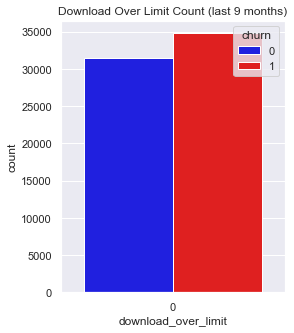

In [30]:
data = df[df['download_over_limit']<1]
plt.figure(figsize = (4,5))
my_colors = ["blue","red"]
sns.set_palette( my_colors )
sns.countplot(data = data, x = 'download_over_limit', hue = 'churn')
plt.title('Download Over Limit Count (last 9 months)')
plt.show()

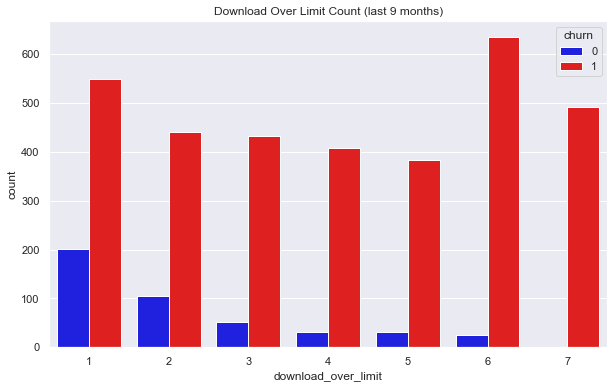

In [31]:
data = df[df['download_over_limit']>=1]
plt.figure(figsize = (10,6))
my_colors = ["blue","red"]
sns.set_palette( my_colors )
sns.countplot(data = data, x = 'download_over_limit', hue = 'churn')
plt.title('Download Over Limit Count (last 9 months)')
plt.show()

In [32]:
df.groupby('download_over_limit')['churn'].value_counts()

download_over_limit  churn
0                    1        34756
                     0        31393
1                    1          549
                     0          202
2                    1          441
                     0          105
3                    1          433
                     0           52
4                    1          408
                     0           32
5                    1          383
                     0           32
6                    1          636
                     0           26
7                    1          491
                     0            1
Name: churn, dtype: int64

# **Checking for Multicollinearity**

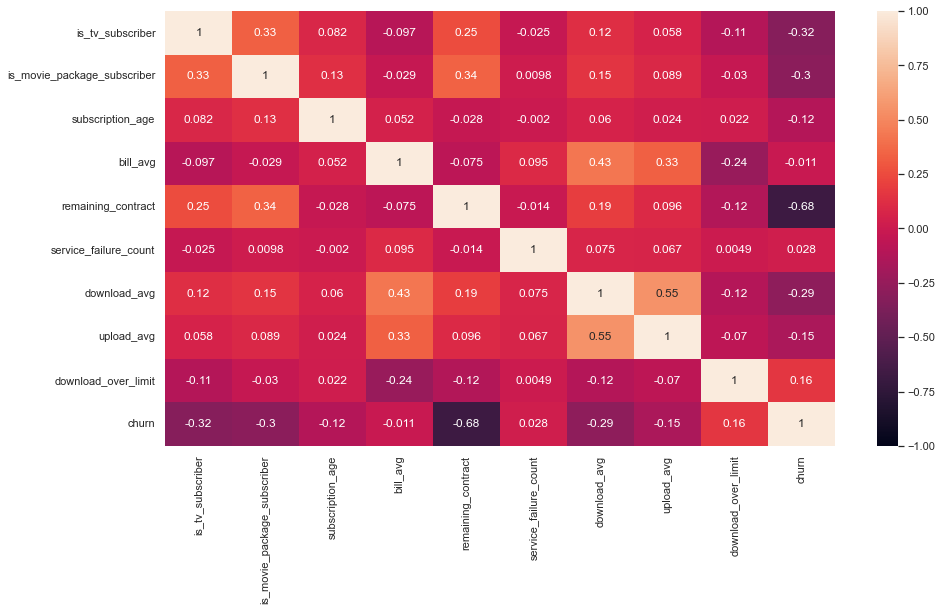

In [33]:
correlation = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

In [34]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:

# the independent variables set
X = df.iloc[:-1]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature       VIF
0             is_tv_subscriber  4.452635
1  is_movie_package_subscriber  1.892918
2             subscription_age  2.362281
3                     bill_avg  3.677469
4           remaining_contract  2.301292
5        service_failure_count  1.131285
6                 download_avg  2.595975
7                   upload_avg  1.737151
8          download_over_limit  1.129238
9                        churn  2.516260


# **Data Transformation**

In [36]:
#Importing necessary modules
from sklearn.preprocessing import RobustScaler
from sklearn. model_selection import train_test_split

In [37]:
#isolate the x and y variables
y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

In [38]:
#feature Scaling
rs = RobustScaler().fit(X)
rs.transform(X)

array([[ 0.        ,  0.        ,  4.11983471, ..., -0.38712687,
         0.02272727,  0.        ],
       [-1.        ,  0.        ,  2.5785124 , ..., -0.54384328,
        -0.5       ,  0.        ],
       [ 0.        ,  0.        ,  2.86363636, ..., -0.28824627,
        -0.29545455,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.80991736, ..., -0.51585821,
        -0.45454545,  0.        ],
       [-1.        ,  0.        , -0.81404959, ..., -0.54384328,
        -0.5       ,  0.        ],
       [ 0.        ,  1.        , -0.81404959, ..., -0.54384328,
        -0.5       ,  0.        ]])

In [39]:
#split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# **Logistic Regression**

In [40]:
#Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [42]:
# Defining Parameters
parameters = {'penalty' : ['l2'],
              'C': [0.1, 0.3, 0.6],
              'max_iter': [100, 200, 300]
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.6], 'max_iter': [100, 200, 300],
                         'penalty': ['l2']},
             verbose=5)

In [43]:
#Choosing best parameters
best_clf = clf.best_params_ , clf.best_score_
best_clf

({'C': 0.3, 'max_iter': 200, 'penalty': 'l2'}, 0.8688340344983908)

In [44]:
#Instantiate the Logistic Regression
lr1 = LogisticRegression(C=0.6, penalty='l2', verbose=5,max_iter=200)
lr1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(C=0.6, max_iter=200, verbose=5)

In [45]:
y_pred = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
lr1.score(X_test,y_test)

0.8681727194738347

([<matplotlib.axis.YTick at 0x230c3048fd0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

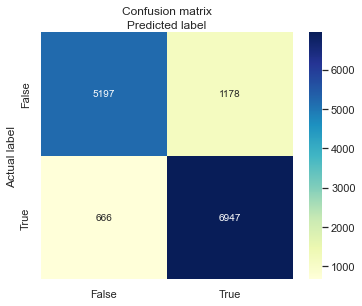

In [46]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [47]:
#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.8681727194738347 : is the accuracy score
0.8550153846153846 : is the precision score
0.9125180612110863 : is the recall score
0.8828313635785996 : is the f1 score


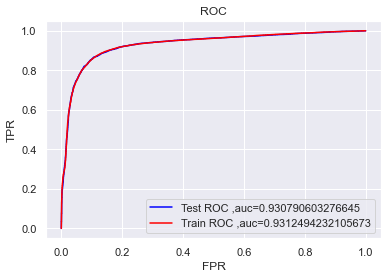

AUC on Test data is 0.930790603276645
AUC on Train data is 0.9312494232105673


In [48]:
#testing our model 

pred_test =lr1.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = lr1.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train, pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

# **K Nearest Neighbours**

In [49]:
#Importing necessary modules
from sklearn.neighbors import KNeighborsClassifier

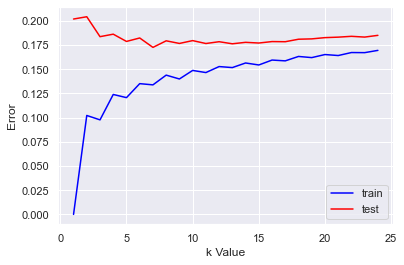

In [50]:
#Finding K value
error1= []
error2= []
for k in range(1,25):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,25),error1,label="train")
plt.plot(range(1,25),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [51]:
#Instantiate the K Neighbors Classifier
classifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [52]:
y_pred =  classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
cnf_matrix1= confusion_matrix(y_test,y_pred)

([<matplotlib.axis.YTick at 0x230c3c123a0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

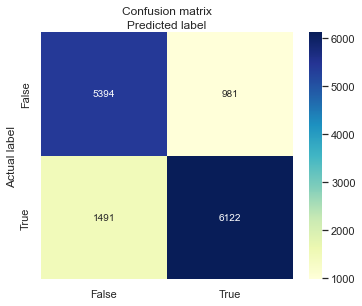

In [54]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [55]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.8232770946525594 : is the accuracy score
0.8618893425313248 : is the precision score
0.8041507946932878 : is the recall score
0.8320195705354716 : is the f1 score


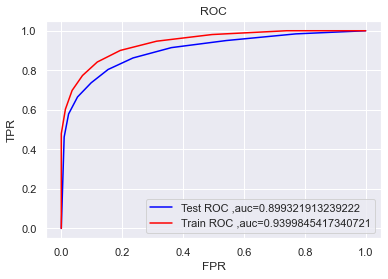

AUC on Test data is 0.899321913239222
AUC on Train data is 0.9399845417340721


In [56]:
#Testing our model 

pred_test =classifier.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = classifier.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train, pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

# **RANDOM FOREST**

In [59]:
# Import the modules we are using
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Defining Parameters
param_dist = {"max_features": [2,3,5],
              "min_samples_leaf": [3,4,6],
              "criterion": ["gini"],
              "n_estimators": [500]}


# Build the grid search
dfrst = RandomForestClassifier()
grid = GridSearchCV(estimator=dfrst, param_grid=param_dist, cv = 5, n_jobs=-1)
grid_results = grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'criterion': 'gini',
  'max_features': 5,
  'min_samples_leaf': 3,
  'n_estimators': 500},
 0.9417178779481693)

In [61]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

([<matplotlib.axis.YTick at 0x230cc85b340>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

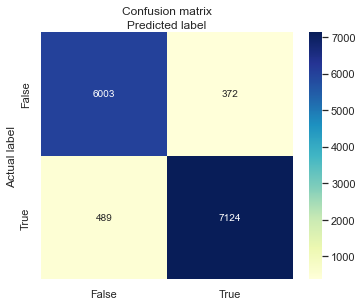

In [62]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [63]:
#Evaluation Metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.9384472404918501 : is the accuracy score
0.9503735325506937 : is the precision score
0.9357677656639958 : is the recall score
0.943014097557747 : is the f1 score


# **ADABOOST**

In [64]:
#Importing Modules
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
#Instantiate a classifier
ada = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1,
                                        min_samples_split=4,
                                        max_leaf_nodes=5),
                                         n_estimators=1000,learning_rate=0.2)

In [66]:
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_leaf_nodes=5,
                                                         min_samples_split=4),
                   learning_rate=0.2, n_estimators=1000)

In [67]:
y_pred=ada.predict(X_test)

In [68]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.93279954246497 : is the accuracy score
0.9480327648717605 : is the precision score
0.9273610928674636 : is the recall score
0.9375830013280213 : is the f1 score


In [69]:
#Hyperparameter Tuning using Grid Search
ada_1 = GridSearchCV(ada, {'learning_rate':[0.1,0.15,0.20],'n_estimators':[500, 750, 1000]}, scoring = 'roc_auc', cv=5)
ada_1.fit(X_train,y_train)
print(ada_1.best_score_)
print(ada_1.best_params_)

0.9652655583326034
{'learning_rate': 0.2, 'n_estimators': 1000}


In [70]:
#Using best parameters
ada_2 =  AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=1,
                                        min_samples_split=4,
                                        max_leaf_nodes=5),
                                        n_estimators=1000, learning_rate=0.2)

ada_2.fit(X_train,y_train)
y_pred=ada_2.predict(X_test)

In [71]:
#Evaluation metrics
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")

0.93279954246497 : is the accuracy score
0.9480327648717605 : is the precision score
0.9273610928674636 : is the recall score
0.9375830013280213 : is the f1 score


# **XGBOOST**

In [73]:
#importing modules
import xgboost as xgb
from xgboost import XGBClassifier

In [74]:
#create xgboost matrices 
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

In [75]:
#set the parameters part 1
parameters1 = {'learning_rate': 0.15,
               'max_depth': 4,
               'colsample_bytree': 0.75,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0.5, 
               'random_state': 123,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [76]:
#run XGBoost
model1 = xgb.train(params = parameters1,
                   dtrain = Train,
                   num_boost_round = 500)

In [77]:
#Predictions part 1
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.5, 1, 0)

In [78]:
#Confusion MAtrix
confusion_matrix1 = confusion_matrix(y_test, predictions1)
print(confusion_matrix1)

[[6022  353]
 [ 510 7103]]


In [79]:
#Confusion MAtrix
confusion_matrix1 = confusion_matrix(y_test, predictions1)
print(confusion_matrix1)

[[6022  353]
 [ 510 7103]]


In [80]:
#Predictions part 2
predictions_2 = model1.predict(Test)
predictions_2 = np.where(predictions_2 > 0.25, 1, 0)

In [82]:
#Confusion Matrix
confusion_matrix2 = confusion_matrix(y_test, predictions_2)
print(confusion_matrix2)

[[5806  569]
 [ 355 7258]]


In [83]:
#Predictions part 3
predictions_3 = model1.predict(Test)
predictions_3 = np.where(predictions_3 > 0.10, 1, 0)

In [84]:
#Confusion Matrix
confusion_matrix3 = confusion_matrix(y_test, predictions_3)
print(confusion_matrix3)

[[5047 1328]
 [ 199 7414]]


In [85]:
#Evaluation metrics
print(accuracy_score(y_test, predictions_3), ": is the accuracy score")
print(precision_score(y_test, predictions_3), ": is the precision score")
print(recall_score(y_test, predictions_3), ": is the recall score")
print(f1_score(y_test, predictions_3), ": is the f1 score")

0.890835001429797 : is the accuracy score
0.8480896819949668 : is the precision score
0.9738605017732825 : is the recall score
0.9066340568633445 : is the f1 score


# **RESULT**

In [86]:
df= pd.DataFrame({'Accuracy' : [82.3,86.8,94.1,93.2,88.8],
                 'Precision' : [86.1,85.5,95.6,94.8,84.5],
                 'Recall' : [80.4,91.3,93.4,92.7,97.4],
                 'F1' : [83.2,88.3,94.5,93.7,90.5]},
                 index=['KNN Neighbours', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'XgBoost '])
df

,Accuracy,Precision,Recall,F1
KNN Neighbours,82.3,86.1,80.4,83.2
Logistic Regression,86.8,85.5,91.3,88.3
Random Forest,94.1,95.6,93.4,94.5
AdaBoost,93.2,94.8,92.7,93.7
XgBoost,88.8,84.5,97.4,90.5


**XGBoost Classifier has turned out to be the best classifier among all five models as our objective was to identify potential users who were more likely to churn and by achieving a recall score of 97.4%, after manipulating the threshold for classification, I can say that the objective has been fulfilled.**